In [19]:
import csv
import os
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np

In [2]:
N = ord("B") % 3 + 1
print("Variant #" + str(N))

Variant #1


In [3]:
def get_csv_column(file, name):
    if not os.path.exists(file):
        raise FileNotFoundError(f"The file '{file}' does not exist.")

    with open(file, 'r') as f:
        reader = csv.reader(f)
        header = next(reader)

        if name not in header:
            raise ValueError(f"The column '{name}' does not exist in the CSV file.")

        index = header.index(name)
        return np.array([int(row[index]) if row[index] else 0 for row in reader])

In [4]:
def parse_dates(file):
    with open(file, 'r') as f:
        reader = csv.reader(f)
        header = next(reader)
        date_idx = header.index('date')
        return [datetime.strptime(row[date_idx], '%Y-%m-%d') for row in reader]

In [5]:
def daily_loses():
    return np.abs(np.diff(aircraft_losses, prepend=aircraft_losses[0]))

In [6]:
def top_losses(top=3):
    return np.sort(daily_losses)[-top:][::-1]

In [7]:
def losses_in_period(start, end):
    indices = [i for i, date in enumerate(dates) if start <= date <= end]
    losses = daily_losses[indices]
    return np.sum(losses)

In [ ]:
def mean_losses_in_period(start, end):
    indices = [i for i, date in enumerate(dates) if start <= date <= end]
    losses = daily_losses[indices]
    if len(losses) == 0:
        return 0
    return np.mean(losses)

In [21]:
file_path = './2022 Russia Ukraine War/russia_losses_equipment.csv'
dates = parse_dates(file_path)
aircraft_losses = get_csv_column(file_path, 'aircraft')

daily_losses = daily_loses()
formatted_dates = np.array([date.strftime('%Y-%m-%d') for date in dates])
non_zero_losses = daily_losses[daily_losses != 0]
filtered_dates = formatted_dates[daily_losses != 0]

output = np.char.add(filtered_dates, ': ')
output = np.char.add(output, non_zero_losses.astype(str))

print("Добові втрати літаків:")
print('\n'.join(output))

top_3_losses = top_losses()
print(f"Три найбільші добові втрати літаків: {top_3_losses}")

total_summer_losses = losses_in_period(datetime(2022, 6, 1), datetime(2022, 8, 31))
print(f"Кількість літаків, збитих влітку 2022 року: {total_summer_losses}")

if len(dates) < 300:
    mean_last_300_days = np.mean(daily_losses)
else:
    mean_last_300_days = mean_losses_in_period(dates[-1], dates[-300])

print(f"Середнє значення втрат авіації за останні 300 днів: {mean_last_300_days}")

Добові втрати літаків:
2024-10-02: 1
2024-09-11: 1
2024-08-27: 1
2024-08-14: 1
2024-08-07: 1
2024-08-04: 2
2024-07-23: 1
2024-07-19: 1
2024-07-07: 1
2024-06-27: 1
2024-06-10: 1
2024-06-09: 1
2024-05-25: 1
2024-05-23: 1
2024-05-22: 1
2024-05-17: 1
2024-05-16: 2
2024-05-13: 1
2024-05-11: 1
2024-05-04: 1
2024-04-19: 1
2024-03-02: 1
2024-03-01: 1
2024-02-29: 3
2024-02-27: 2
2024-02-23: 1
2024-02-21: 1
2024-02-19: 2
2024-02-18: 1
2024-02-17: 3
2024-01-29: 1
2024-01-15: 2
2023-12-24: 2
2023-12-22: 3
2023-12-05: 1
2023-11-14: 1
2023-11-01: 1
2023-10-29: 1
2023-10-18: 1
2023-10-17: 1
2023-10-15: 1
2023-10-13: 1
2023-10-10: 1
2023-10-02: 1
2023-09-30: 1
2023-06-28: 1
2023-06-06: 1
2023-05-27: 3
2023-05-25: 1
2023-05-21: 1
2023-04-15: 1
2023-04-07: 1
2023-03-28: 1
2023-03-15: 1
2023-03-09: 1
2023-03-06: 1
2023-03-03: 1
2023-03-02: 1
2023-02-26: 1
2023-02-19: 1
2023-02-13: 2
2023-02-11: 1
2023-02-07: 1
2023-02-02: 1
2023-01-27: 1
2023-01-25: 2
2023-01-24: 1
2023-01-23: 2
2023-01-17: 1
2023-01-12:

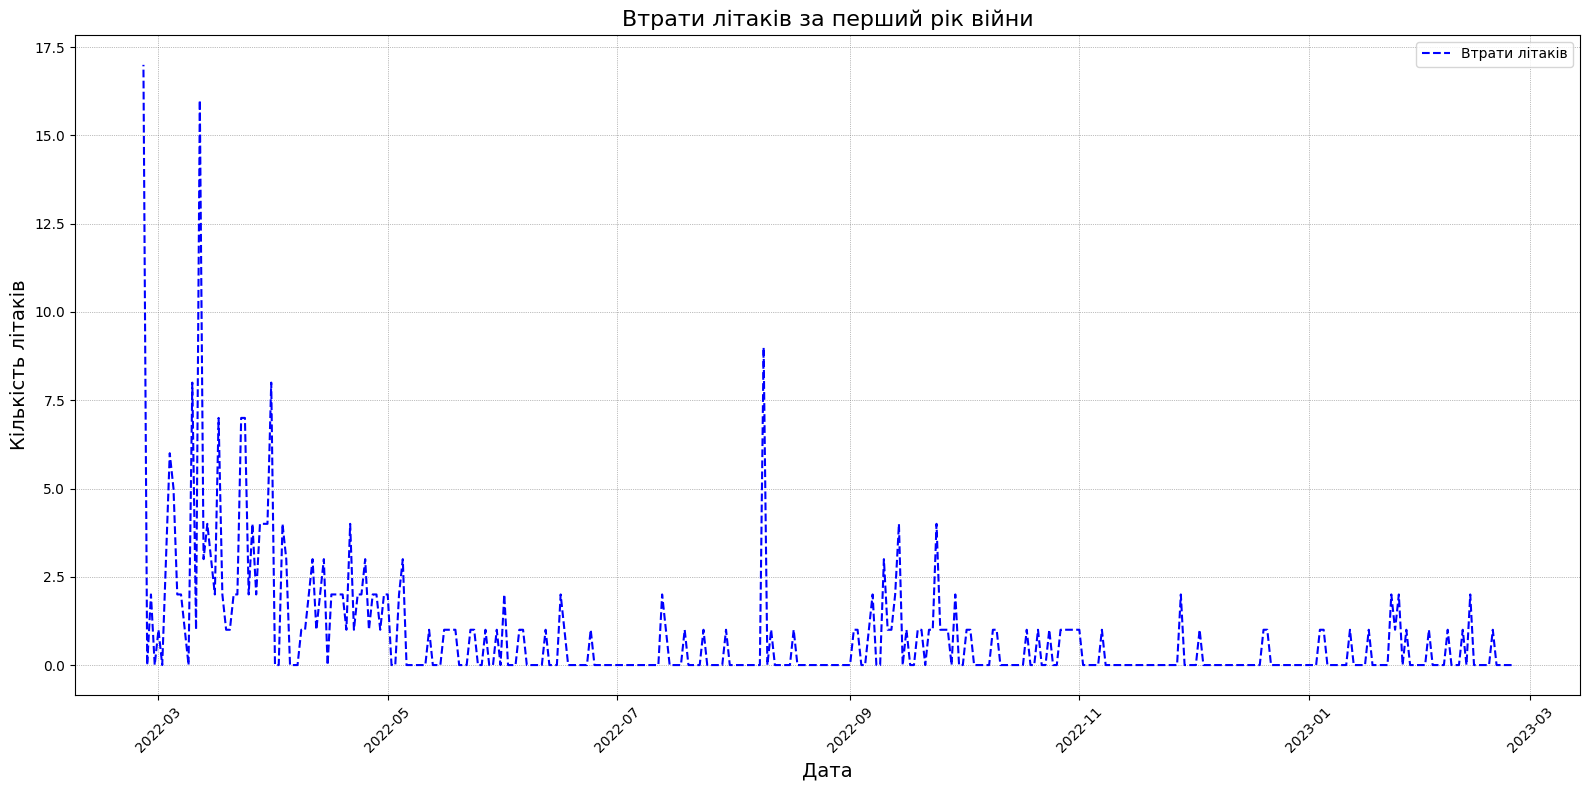

In [22]:
start_date = min(dates)
end_date = start_date.replace(year=start_date.year + 1)

year_indices = np.array([i for i, date in enumerate(dates) if start_date <= date < end_date])
year_losses = daily_losses[year_indices]
year_dates = np.array(dates)[year_indices]

plt.figure(figsize=(16, 8), dpi=100)

plt.plot(year_dates, year_losses, linestyle='--', color='b', label='Втрати літаків')

plt.title('Втрати літаків за перший рік війни', fontsize=16)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Кількість літаків', fontsize=14)
plt.legend()
plt.grid(color='gray', linestyle=':', linewidth=0.5)

plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('aircraft_losses_first_year.png', format='png')

plt.show()
